In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy.optimize

In [2]:
np.random.seed(842424)

In [3]:
nSamples = 1000
inputDim = 2
outputDim = 1

In [13]:
batchSize = 50
nEpochs = 100

In [5]:
x1 = np.random.normal(1., 0.25, (nSamples//2, inputDim))
x2 = np.random.normal(2., 0.30, (nSamples//2, inputDim))
y1 = np.zeros(nSamples//2)
y2 = np.ones(nSamples//2)
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

In [6]:
shuffled = np.arange(nSamples)
np.random.shuffle(shuffled)
xs = x[shuffled]
ys = y[shuffled]

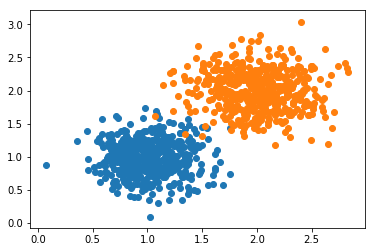

In [7]:
plt.scatter(*zip(*x1))
plt.scatter(*zip(*x2))

In [8]:
def activation(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def lr_predict(weights, x_b):
    return activation(np.dot(x_b, weights))

In [10]:
def lr_loss(weights, x_b, label):
    loss = 0.
    inputDim = x.shape[0]
    grad = np.zeros(inputDim + 1)
    
    y = lr_predict(weights, x_b)
    
    # loss = label * np.log(y) - (1 - label) * np.log(1 - y)
    # == -label * np.dot(weights, x_b) + np.log(1 + np.exp(np.dot(weights, x_b)))
    loss = (y - label)**2 / 2
    
    # grad = -label * x_b + x_b * (1 + np.exp(np.dot(weights, x_b)))
    grad = -(y - label) * y**2 * np.exp(-np.dot(weights, x_b)) * x_b
    
    return loss, grad

In [11]:
def lr_train(x, labels, nEpochs, lr=0.01):
    weights = np.zeros(x.shape[1]+1)
    # def fun(weights, *args):
    #     return lr_loss(weights, x, labels)
    # opt = scipy.optimize.minimize(fun, initialWeights, method='CG', jac=True, options={'disp': False, 'maxiter': 50})
    x_b = np.hstack((np.ones((x.shape[0], 1)), x))    
    for epoch in range(nEpochs):
        sumloss = 0.
        for n in range(nSamples):
            loss, grad = lr_loss(weights, x_b[n], labels[n])
            sumloss += loss
            weights += lr * grad
            pass
        sumloss /= nSamples
        print(sumloss)
        pass
    return weights

In [16]:
weights = lr_train(xs, ys, nEpochs)

0.1125483507813009
0.10127548847800777
0.09222494760614657
0.08424092672860116
0.07724791408391797
0.071142673179085
0.06581431826394248
0.061156293594978095
0.05707217233510462
0.05347768332001382
0.050300679863254594
0.047480123460112315
0.044964696119725936
0.04271136426927733
0.04068404707545251
0.038852448671851565
0.03719106580268211
0.03567835986448456
0.03429607341033486
0.03302866915755037
0.03186287073827558
0.03078728691908087
0.029792103820114362
0.028868832333926404
0.028010100296649444
0.027209480952644062
0.026461350893764668
0.025760771987226417
0.02510339287961156
0.024485366524862877
0.023903280871772317
0.023354100395687107
0.022835116597990153
0.02234390594800996
0.021878294023470458
0.021436324831749513
0.021016234476449094
0.020616428481038007
0.020235462200705035
0.019872023850632817
0.01952491975810366
0.019193061510671735
0.018875454725871977
0.018571189211790972
0.018279430324075918
0.017999411355010715
0.017730426815287026
0.017471826489951405
0.0172230101674

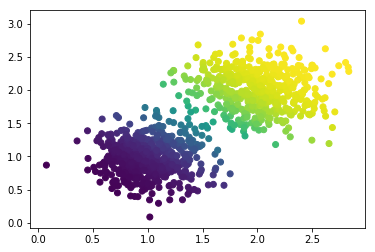

In [17]:
plt.scatter(*zip(*xs), c=[lr_predict(weights, x) for x in np.hstack((np.ones((x.shape[0], 1)), xs))])

In [19]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


In [20]:
model = Sequential()
model.add(Dense(outputDim, input_dim=inputDim, activation='sigmoid'))

In [21]:
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [22]:
fit = model.fit(xs, ys, batch_size=batchSize, epochs=nEpochs)

Epoch 1/100
1000/1000 [==============================] - 0s 183us/step - loss: 0.2545 - acc: 0.5020
Epoch 2/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.2478 - acc: 0.5040
Epoch 3/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.2418 - acc: 0.5060
Epoch 4/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.2364 - acc: 0.5110
Epoch 5/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.2317 - acc: 0.5170
Epoch 6/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.2276 - acc: 0.5190
Epoch 7/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.2241 - acc: 0.5260
Epoch 8/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.2210 - acc: 0.5320
Epoch 9/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.2184 - acc: 0.5390
Epoch 10/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.2162 - acc: 0.5480
Epoch 11

1000/1000 [==============================] - 0s 18us/step - loss: 0.1634 - acc: 0.8200
Epoch 84/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1628 - acc: 0.8210
Epoch 85/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.1623 - acc: 0.8210
Epoch 86/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1617 - acc: 0.8230
Epoch 87/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1612 - acc: 0.8260
Epoch 88/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.1607 - acc: 0.8260
Epoch 89/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1601 - acc: 0.8290
Epoch 90/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.1596 - acc: 0.8320
Epoch 91/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.1591 - acc: 0.8340
Epoch 92/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1585 - acc: 0.8370
Epoch 93/100


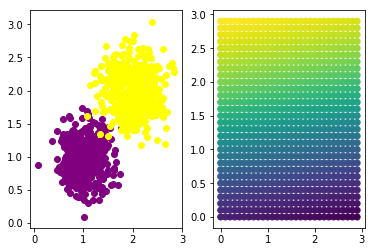

In [23]:
ls = np.zeros((30, 30))
ms = np.zeros((30, 30))
ns = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        ms[i, j] = i/10
        ns[i, j] = j/10
        ls[i, j] = model.predict(np.array([ms[i, j], ns[i, j]]).reshape((1, 2)))
        pass
    pass
ms.flatten()
ns.flatten()
ls.flatten()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(*zip(*x1), c='purple')
ax1.scatter(*zip(*x2), c='yellow')
# ax1.scatter(ms, ns, c=ls)

# ax2.scatter(*zip(*x1))
# ax2.scatter(*zip(*x2))
ax2.scatter(ms, ns, c=ls)
# ax2.scatter(ms, ns, c=np.rint(ls))


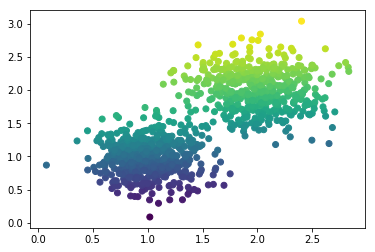

In [29]:
plt.scatter(*zip(*xs), c=model.predict(xs, batchSize).reshape(nSamples, ))